# Assignment 3: T-Test, Z-Test, ANOVA and Corealtion/Regression

In [ ]:
import pandas as pd
import seaborn as sns
from statsmodels.stats.weightstats import ttest_ind, ztest
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [ ]:
# Load the Iris Dataset
iris = sns.load_dataset('iris')

In [ ]:
# 1. T-Test
# Compare petal lengths of Setosa and Versicolor
setosa_petal_length = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal_length = iris[iris['species'] == 'versicolor']['petal_length']
t_statistic, p_value, degrees_of_freedom = ttest_ind(setosa_petal_length, versicolor_petal_length)

print(f"T-Test Results (Setosa vs. Versicolor petal length):")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-Test Results (Setosa vs. Versicolor petal length):
T-statistic: -39.4927193915381
P-value: 5.404910513441677e-62


In [ ]:
# 2. Z-Test
# Test if mean sepal length of Setosa equals 5.0
# Assuming population standard deviation is unknown and n < 30, we'll skip this test.
# If you have the population standard deviation or n > 30, you can uncomment and modify the code below:
# from statsmodels.stats.weightstats import ztest
setosa_sepal_length = iris[iris['species'] == 'setosa']['sepal_length']
z_statistic, p_value = ztest(setosa_sepal_length, value=5.0)  # Replace with actual population std if known
print(f"\nZ-Test Results (Setosa sepal length = 5.0):")
print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")


Z-Test Results (Setosa sepal length = 5.0):
Z-statistic: 0.12036212238318056
P-value: 0.9041962951772449


In [ ]:
# 3. ANOVA
# Compare petal widths across all three species
f_statistic, p_value = f_oneway(
    iris[iris['species'] == 'setosa']['petal_width'],
    iris[iris['species'] == 'versicolor']['petal_width'],
    iris[iris['species'] == 'virginica']['petal_width']
)

print(f"\nANOVA Results (Petal width across all species):")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


ANOVA Results (Petal width across all species):
F-statistic: 960.007146801809
P-value: 4.169445839443116e-85


In [ ]:
# 4. Correlation/Regression
# Explore relationship between sepal length and petal length
correlation_coefficient, p_value = pearsonr(iris['sepal_length'], iris['petal_length'])

print(f"\nCorrelation between Sepal Length and Petal Length:")
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Correlation between Sepal Length and Petal Length:
Pearson correlation coefficient: 0.8717537758865831
P-value: 1.0386674194498827e-47


In [ ]:
# Regression using statsmodels
model = ols('petal_length ~ sepal_length', data=iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.04e-47
Time:                        19:13:13   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.1014      0.507    -14.016   

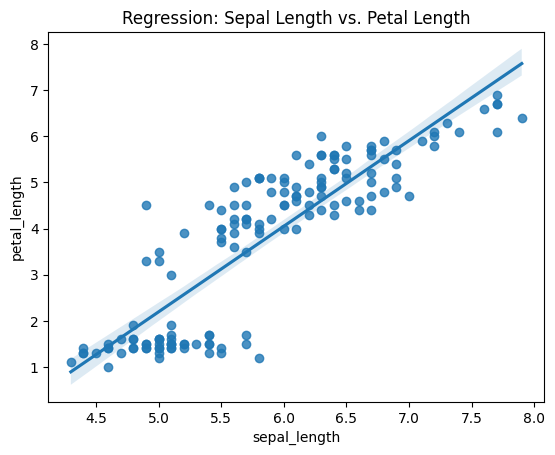

In [ ]:
# Scatter plot with regression line
sns.regplot(x='sepal_length', y='petal_length', data=iris)
plt.title('Regression: Sepal Length vs. Petal Length')
plt.show()